### Unsupervised Learnin Clustering France Weather Data

*Loading Frances Weather Data

In [0]:
f = open('weather_for_villes.pickle','rb')

In [0]:
import pickle
meteo = pickle.load(f)
f.close()

In [0]:
meteo[1].json()

{'current': {'cloudcover': 100,
  'feelslike': 7,
  'humidity': 98,
  'is_day': 'no',
  'observation_time': '10:30 PM',
  'precip': 10,
  'pressure': 1009,
  'temperature': 8,
  'uv_index': 1,
  'visibility': 6,
  'weather_code': 302,
  'weather_descriptions': ['Moderate rain'],
  'weather_icons': ['https://assets.weatherstack.com/images/wsymbols01_png_64/wsymbol_0034_cloudy_with_heavy_rain_night.png'],
  'wind_degree': 223,
  'wind_dir': 'SW',
  'wind_speed': 6},
 'location': {'country': 'France',
  'lat': '46.250',
  'localtime': '2020-04-30 00:30',
  'localtime_epoch': 1588206600,
  'lon': '5.667',
  'name': 'Oyannax',
  'region': 'Rhone-Alpes',
  'timezone_id': 'Europe/Paris',
  'utc_offset': '2.0'},
 'request': {'language': 'en',
  'query': 'Lat 46.25 and Lon 5.67',
  'type': 'LatLon',
  'unit': 'm'}}

*Highlighting how the weatherdata was originally obtained 

In [0]:
import pandas as pd
villes = pd.read_csv('villes.csv')

In [0]:
import requests

params = {
  'access_key': 'mon-clef',
  'query': '46.1000,5.81667'
}

api_result = requests.get('http://api.weatherstack.com/current', params)
api_response = api_result.json()

In [0]:
villes

,No,Dep,Nom,pop 2010,longdeg,latdeg
0,0,1,amberieu en bugey,13835,5.35000,45.9500
1,1,1,oyonnax,22650,5.66667,46.2500
2,2,1,bellegarde sur valserine,11790,5.81667,46.1000
3,3,1,bourg en bresse,40088,5.21667,46.2000
4,4,1,gex,10372,6.06667,46.3333
...,...,...,...,...,...,...
884,884,95,eragny,16886,2.10000,49.0167
885,885,95,sarcelles,58614,2.38333,49.0000
886,886,95,soisy sous montmorency,17428,2.30000,48.9833
887,887,95,enghien les bains,11809,2.31667,48.9667


*Quick excursion how to use pickle

In [0]:
a = [1,2,3,4]

In [0]:
fout = open('ma_list.pickle','wb')
pickle.dump(a, fout)
fout.close()

In [0]:
fin = open('ma_list.pickle','rb')
ma_list = pickle.load(fin)
fin.close()

In [0]:
ma_list

[1, 2, 3, 4]

*Transforming weather data into a dataframe 

In [0]:
temp=[]
wind=[]
hum=[]
pressure=[]
for i in range(len(meteo)):
  temp.append(meteo[i].json()['current']['temperature'])
  wind.append(meteo[i].json()['current']['wind_speed'])
  hum.append(meteo[i].json()['current']['humidity'])
  pressure.append(meteo[i].json()['current']['pressure'])


In [0]:
villes['temp'] = temp
villes['wind'] = wind
villes['hum'] = hum
villes['pressure'] = pressure 

*Our final dataframe

In [0]:
villes

,No,Dep,Nom,pop 2010,longdeg,latdeg,temp,wind,hum,pressure
0,0,1,amberieu en bugey,13835,5.35000,45.9500,10,7,96,1009
1,1,1,oyonnax,22650,5.66667,46.2500,8,6,98,1009
2,2,1,bellegarde sur valserine,11790,5.81667,46.1000,8,6,98,1009
3,3,1,bourg en bresse,40088,5.21667,46.2000,9,6,98,1009
4,4,1,gex,10372,6.06667,46.3333,11,0,82,1011
...,...,...,...,...,...,...,...,...,...,...
884,884,95,eragny,16886,2.10000,49.0167,9,7,87,1003
885,885,95,sarcelles,58614,2.38333,49.0000,11,13,82,1004
886,886,95,soisy sous montmorency,17428,2.30000,48.9833,11,13,82,1004
887,887,95,enghien les bains,11809,2.31667,48.9667,11,13,82,1004


*Installing necessary packages into the machine in order to show the data on a map

In [0]:
!apt install proj-bin libproj-dev libgeos-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 25 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (272 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144568 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Prepari

In [0]:
!pip install https://github.com/matplotlib/basemap/archive/master.zip

     | 207.8MB 112.2MB/s
     |████████████████████████████████| 10.4MB 4.5MB/s 
     |████████████████████████████████| 225kB 53.8MB/s 
  Created wheel for basemap: filename=basemap-1.2.1-cp36-cp36m-linux_x86_64.whl size=121756032 sha256=927f9d6bc08ec9730a3b7812ccfde49af38c09511335ab93e92afa06e56cdfeb
  Stored in directory: /tmp/pip-ephem-wheel-cache-slawf803/wheels/98/4a/fc/ce719b75d97e646645c225f3332b1b217536100314922e9572
  Created wheel for pyshp: filename=pyshp-2.1.0-cp36-none-any.whl size=32609 sha256=764188ce1091250e7cdacc17ca70cf787335bb802197f8856dc52f3c50182015
  Stored in directory: /root/.cache/pip/wheels/a6/0c/de/321b5192ad416b328975a2f0385f72c64db4656501eba7cc1a
Successfully built basemap pyshp


*Plotting a Map of France

In [0]:
from mpl_toolkits.basemap import Basemap

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
my_map = Basemap(projection='merc',resolution='l',area_thresh=1000,
                 llcrnrlon = -5.0, llcrnrlat=42.0,
                 urcrnrlon = 8.0, urcrnrlat=52.0)

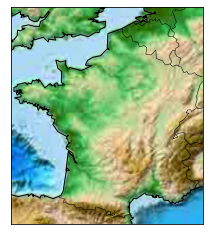

In [0]:
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.etopo()

*Plot found clusters -> This step has to be performed after "Prepare the obtained clusters for plotting" please continue below

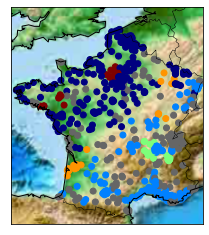

In [0]:
x,y = my_map(villes['longdeg'].to_numpy(),villes['latdeg'].to_numpy())
my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawlsmask(land_color='orange', ocean_color='skyblue')
my_map.etopo()
my_map.scatter(x,y,c=c)

*Extract only the weather data of our dataset

In [0]:
X = villes.loc[:,['temp','wind','hum','pressure']].copy()

In [0]:
X

,temp,wind,hum,pressure
0,10,7,96,1009
1,8,6,98,1009
2,8,6,98,1009
3,9,6,98,1009
4,11,0,82,1011
...,...,...,...,...
884,9,7,87,1003
885,11,13,82,1004
886,11,13,82,1004
887,11,13,82,1004


*Rescale our dataset and prepare for clustering

In [0]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

In [0]:
X_scaled[1]

array([-1.56263328, -1.25784758,  1.66365969,  0.62905784])

*Clustering the weatherdata with DBSCAN

In [0]:
from sklearn.cluster import DBSCAN

In [0]:
db = DBSCAN(eps=0.9, min_samples=20,metric='l2').fit(X_scaled)

In [0]:
db.labels_.max()

4

*Prepare the obtained clusters for plotting

In [0]:
import numpy as np
colors = plt.get_cmap('jet')(np.linspace(0.0,1.0,db.labels_.max()+1))
non_clusters = 0
c = []
for i in range(len(db.labels_)):
  if db.labels_[i] == -1:
    c.append([0.4,0.4,0.4])
    non_clusters = non_clusters + 1
  else:
    c.append(colors[db.labels_[i]])

In [0]:
non_clusters

161

In [0]:
len(villes)

889

In [0]:
https://scikit-learn.org/stable/modules/clustering.html